<a href="https://colab.research.google.com/github/1Svenkatesh/Bharat-intern/blob/main/IRIS_Flower_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Iris flower classification is a very popular machine learning project. The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

Importing modules

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv("IRIS.csv")

In [40]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
data.shape

(150, 5)

<Axes: xlabel='species', ylabel='count'>

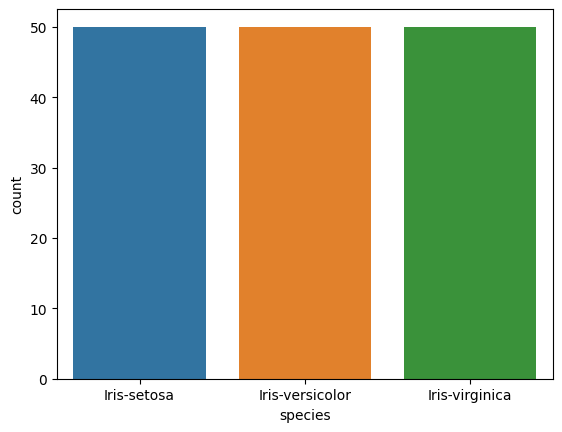

In [44]:
sns.countplot(x="species",data=data)

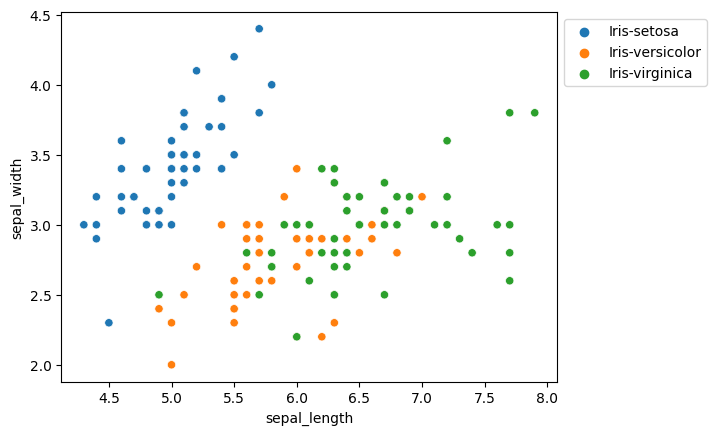

In [45]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

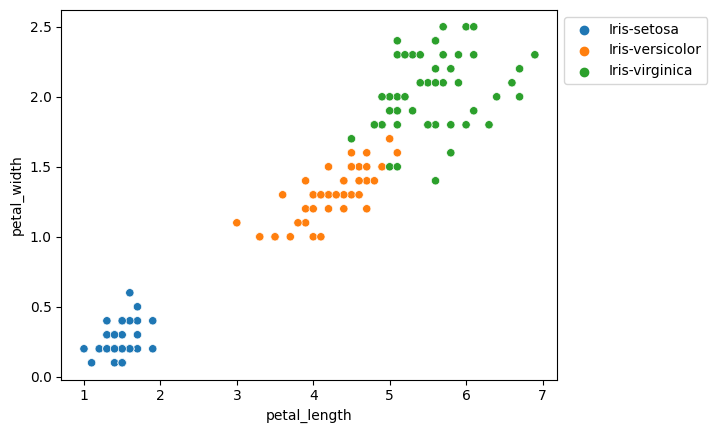

In [46]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

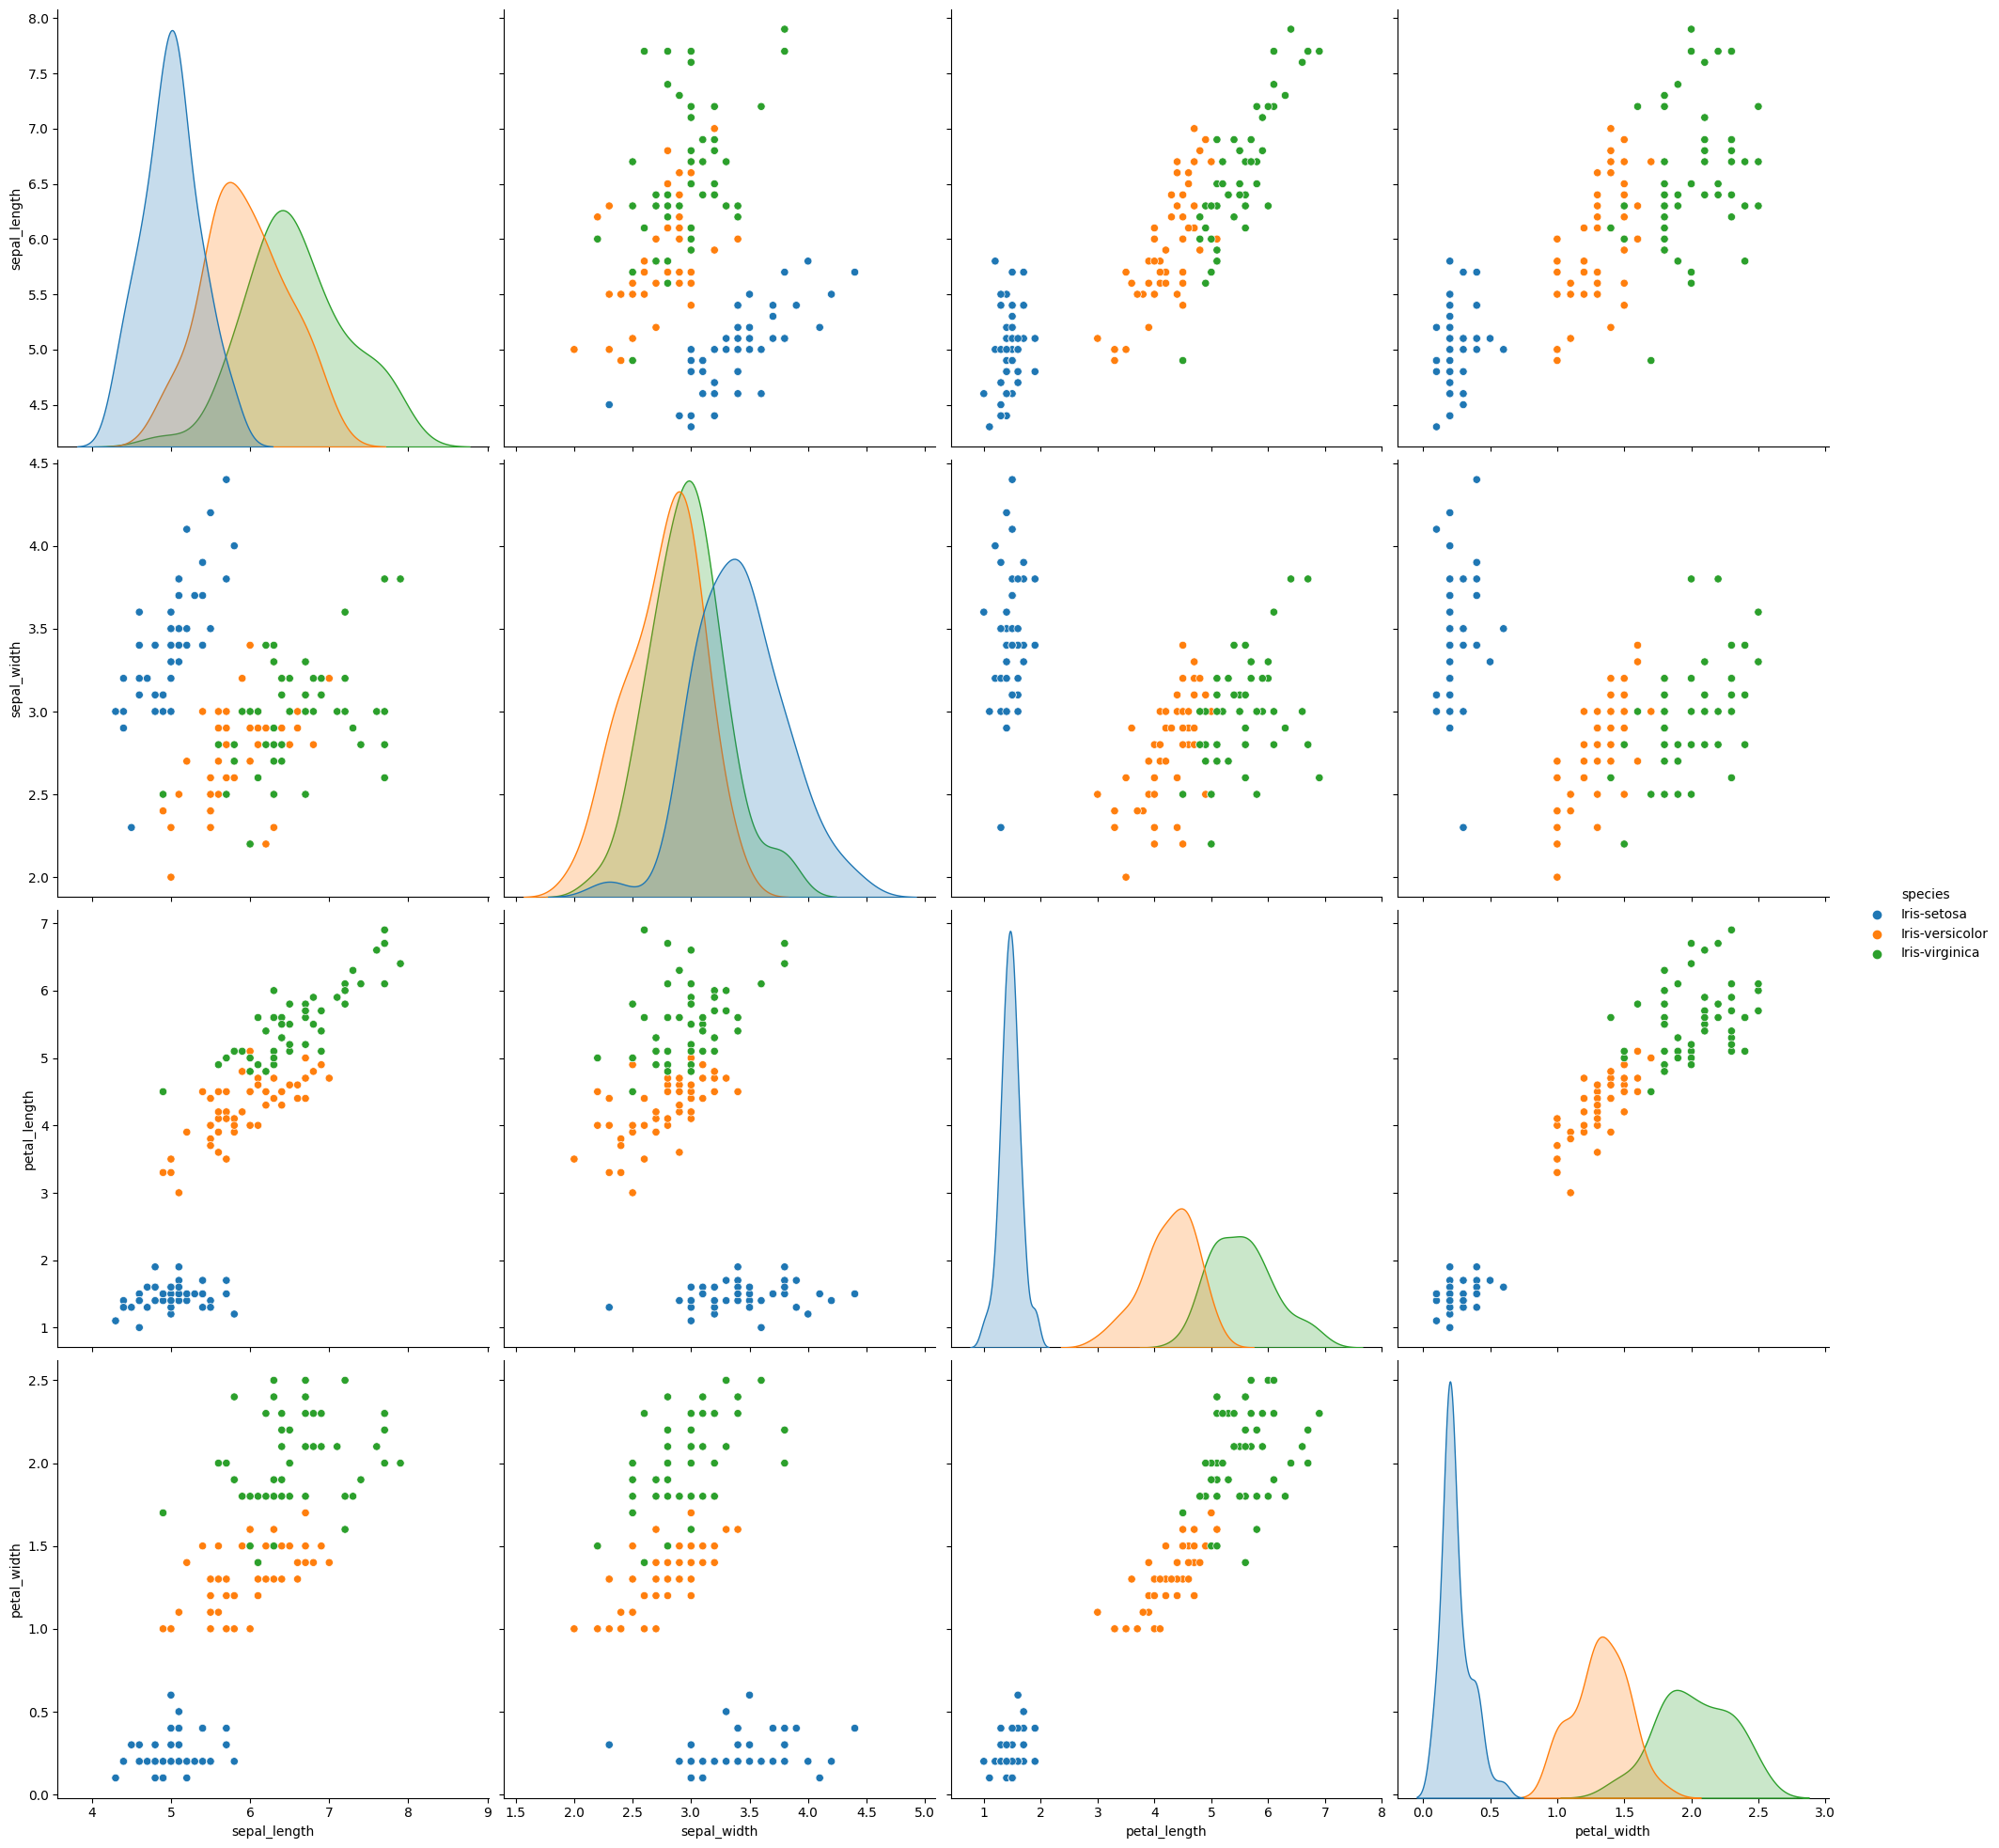

In [47]:
sns.pairplot(data,hue='species', height=5)

<Axes: xlabel='petal_length'>

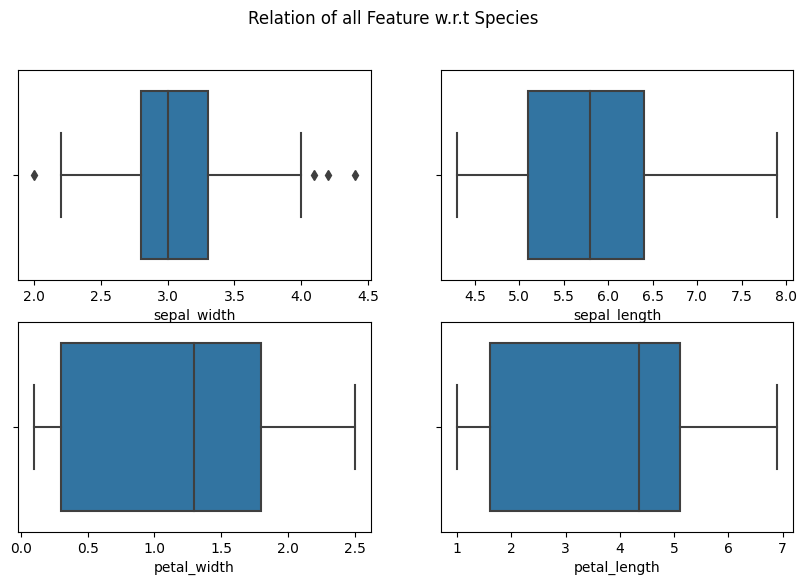

In [48]:
fig,axes=plt.subplots(2,2, figsize=(10,6),sharey=True)
fig.suptitle('Relation of all Feature w.r.t Species')

sns.boxplot(ax=axes[0,0], x="sepal_width",data=data)

sns.boxplot(ax=axes[0,1], x="sepal_length",data=data)

sns.boxplot(ax=axes[1,0], x="petal_width",data=data)

sns.boxplot(ax=axes[1,1], x="petal_length",data=data)

In [49]:
#changing name of flowers to numerical value for better performence , without any encoding method
def change(y):
    if y=="Iris-setosa":
        return 1
    elif y=="Iris-versicolor":
        return 2
    else:
        return 3

data["species"]=data["species"].apply(change)

In [50]:
data['species'].unique()

array([1, 2, 3])

In [51]:
#plotting coorelation of features on species

corela=data.corr(method='pearson')
corela

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

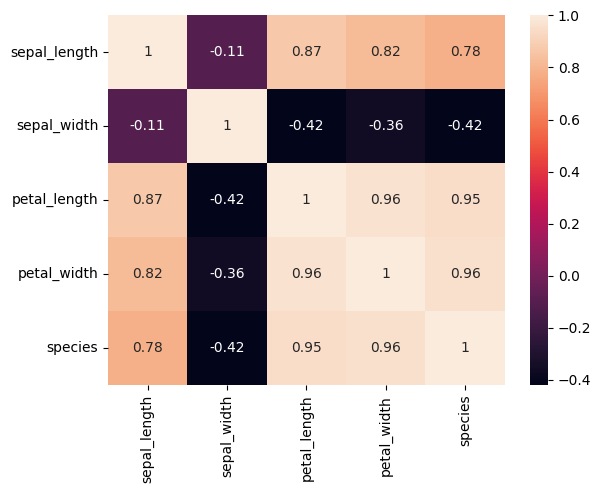

In [52]:
sns.heatmap(corela,annot=True)

In [53]:
#spliting Targget feature from dataset
y=data["species"]

x=data.drop('species',axis=1)

In [54]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [58]:
#performing train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7)

In [59]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [60]:
#using logistic regression because optput is  numerical
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [61]:
y_pred=classifier.predict(x_test)


In [62]:
y_pred=pd.DataFrame(y_pred)

In [63]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred_lr=lr_model.predict(x_test)

In [65]:
y_pred_lr=pd.DataFrame(y_pred_lr)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rfc_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [67]:
y_pred_rfc=rfc_model.predict(x_test)


In [68]:

y_pred_rfc=pd.DataFrame(y_pred_rfc)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred_knn=knn_model.predict(x_test)

In [71]:
y_pred_knn=pd.DataFrame(y_pred_knn)

In [72]:
#evaluation of of all models

from sklearn.metrics import accuracy_score

#Evaluation of decisiontreeclassifier
print("Accuracy score of DecisionTreeClassifier :", accuracy_score(y_pred,y_test))

print("-"*60)
print("-"*60)

#Evaluation of LogisticRegression
print("Accuracy score of LogisticRegression :", accuracy_score(y_pred_lr,y_test))

print("-"*60)
print("-"*60)

#Evaluation of RandomForestClassifier
print("Accuracy score of RandomForestClassifier :", accuracy_score(y_pred_rfc,y_test))

print("-"*60)
print("-"*60)

#Evaluation of KNeighborsClassifier
print("Accuracy score of KNeighborsClassifier :", accuracy_score(y_pred_knn,y_test))


Accuracy score of DecisionTreeClassifier : 0.8947368421052632
------------------------------------------------------------
------------------------------------------------------------
Accuracy score of LogisticRegression : 0.8947368421052632
------------------------------------------------------------
------------------------------------------------------------
Accuracy score of RandomForestClassifier : 0.8947368421052632
------------------------------------------------------------
------------------------------------------------------------
Accuracy score of KNeighborsClassifier : 0.8947368421052632
